<a href="https://colab.research.google.com/github/ArnaldoBetancourt/challenge1/blob/master/Copia_de_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [2]:
import pandas as pd
import matplotlib.pyplot as plt


En este primer análisis debes calcular los ingresos totales de cada tienda. Sumando los valores de la columna Precio de cada tienda para estimar los ingresos

In [3]:

def calcular_ingresos(tienda):

  return tienda['Precio'].sum()
tiendas = {
    'tienda1': tienda,
    'tienda2': tienda2,
    'tienda3': tienda3,
    'tienda4': tienda4
}

ingresos_por_tienda = {}
for nombre, datos in tiendas.items():
  ingresos_por_tienda[nombre] = (calcular_ingresos(datos))

for nombre, ingresos in ingresos_por_tienda.items():
  print(f'{nombre}: {ingresos:.2f}')


tienda1: 1150880400.00
tienda2: 1116343500.00
tienda3: 1098019600.00
tienda4: 1038375700.00


# 2. Ventas por categoría

En este paso debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.


In [12]:
def ventas_por_categoria(tienda):
  ventas = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
  return ventas

ventas_por_tienda = {}
for nombre, datos in tiendas.items():
 ventas_por_tienda[nombre] = ventas_por_categoria(datos)
 print(ventas_por_tienda)



{'tienda1': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64}
{'tienda1': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64, 'tienda2': Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64}
{'tienda1': Categoría del Producto
Muebles                    

# 3. Calificación promedio de la tienda


En este paso, calcularemos las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos .


In [5]:
def calificacion_promedio(tienda):
  calificación = tienda.groupby('Producto')['Calificación'].mean().sort_values(ascending=False)
  calificación = calificación.apply(lambda x: "{:.2f}".format(x))
  return calificación

calificacion_por_tienda = {}
for nombre, datos in tiendas.items():
  calificacion_por_tienda[nombre] = calificacion_promedio(datos)
calificacion_por_tienda

{'tienda1': Producto
 Ajedrez de madera              4.43
 Iniciando en programación      4.29
 Cubertería                     4.23
 Smartwatch                     4.21
 Batería                        4.19
 Impresora                      4.17
 Tablet ABXY                    4.14
 Carrito de control remoto      4.13
 Estufa                         4.13
 Lavadora de ropa               4.13
 Cama box                       4.11
 Kit de bancas                  4.11
 Ciencia de datos con Python    4.10
 Bloques de construcción        4.09
 Guitarra eléctrica             4.09
 Asistente virtual              4.08
 Sillón                         4.07
 Balón de voleibol              4.07
 Cubo mágico 8x8                4.07
 TV LED UHD 4K                  4.05
 Mesa de centro                 4.02
 Lavavajillas                   4.02
 Refrigerador                   4.02
 Smart TV                       4.00
 Sofá reclinable                4.00
 Microondas                     3.98
 Juego de mesa   

# 4. Productos más y menos vendidos

En este paso debes identificar cuáles fueron los productos más vendidos y menos vendidos en cada tienda. Por último, observa los resultados para que quede claro qué productos se destacaron en ventas en cada tienda

In [6]:

def productos_mas_menos_vendidos(tienda):
    ventas_producto = tienda.groupby('Producto')['Precio'].count().sort_values(ascending=False)
    mas_vendido = ventas_producto.index[0]
    menos_vendido = ventas_producto.index[-1]
    return mas_vendido, menos_vendido

productos_por_tienda = {}
for nombre, datos in tiendas.items():
    mas_vendido, menos_vendido = productos_mas_menos_vendidos(datos)
    productos_por_tienda[nombre] = {'más vendido': mas_vendido, 'menos vendido': menos_vendido}

productos_por_tienda


{'tienda1': {'más vendido': 'Armario',
  'menos vendido': 'Auriculares con micrófono'},
 'tienda2': {'más vendido': 'Iniciando en programación',
  'menos vendido': 'Juego de mesa'},
 'tienda3': {'más vendido': 'Kit de bancas',
  'menos vendido': 'Bloques de construcción'},
 'tienda4': {'más vendido': 'Cama box', 'menos vendido': 'Guitarra eléctrica'}}

# 5. Envío promedio por tienda

En este paso, calcularemos el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en envíos en cada tienda.


In [7]:
def costo_promedio_envio(tienda):
  costo_envio = tienda['Costo de envío'].mean()
  costo_envio = "{:.2f}".format(costo_envio)
  return costo_envio

costo_de_envios= {}
for nombre,datos in tiendas.items():
    costo_de_envios[nombre] = costo_promedio_envio(datos)
costo_de_envios

{'tienda1': '26018.61',
 'tienda2': '25216.24',
 'tienda3': '24805.68',
 'tienda4': '23459.46'}

## 6.GENERANDO GRAFICOS


Según las funciones que hayas creado, te recomendamos que generes al menos tres gráficos . Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerda que las gráficas deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

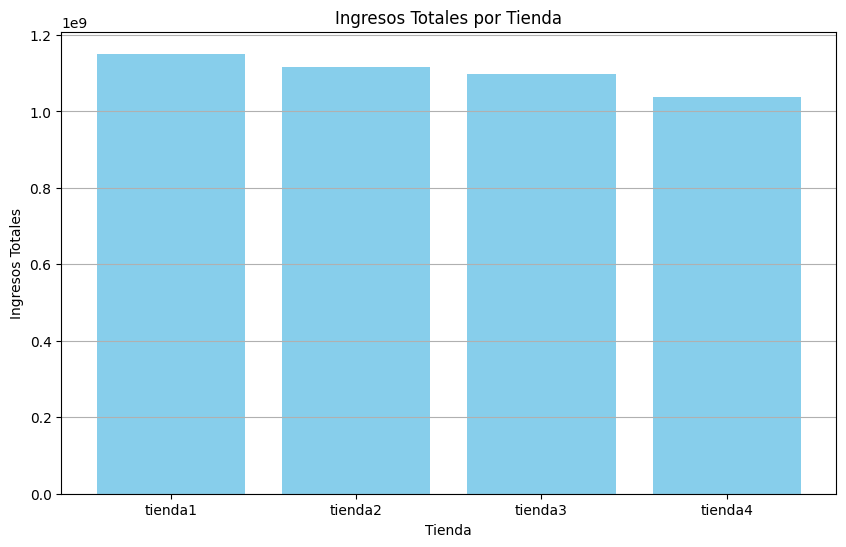

In [10]:
import matplotlib.pyplot as plt
# Gráfico 1: Ingresos totales por tienda (Gráfico de Barras)
plt.figure(figsize=(10, 6))
plt.bar(ingresos_por_tienda.keys(), ingresos_por_tienda.values(), color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales')
plt.grid(axis='y')
plt.show()




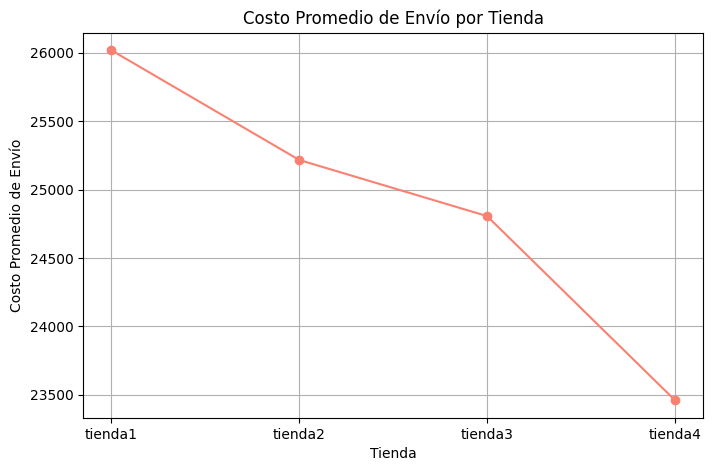

In [11]:
# Gráfico 3: Costo Promedio de Envío por Tienda (Gráfico de Puntos/Dispersión - aunque con pocos puntos, se parece a líneas)
# Convertir los valores de costo de envío a float para graficar
costo_de_envios_float = {nombre: float(costo) for nombre, costo in costo_de_envios.items()}
plt.figure(figsize=(8, 5))
plt.plot(costo_de_envios_float.keys(), costo_de_envios_float.values(), marker='o', linestyle='-', color='salmon')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.grid(True)
plt.show()

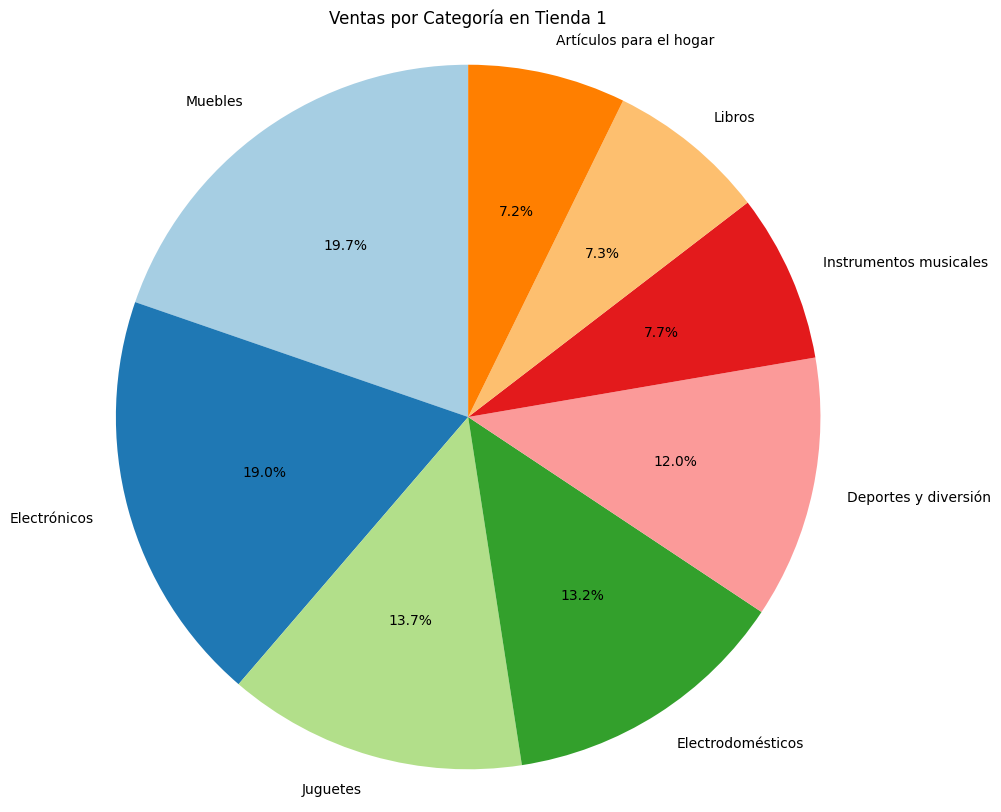

In [9]:
import matplotlib.pyplot as plt
# Gráfico 2: Ventas por Categoría para Tienda 1 (Gráfico de Pastel)
tienda1_categorias = ventas_por_tienda['tienda1']
plt.figure(figsize=(10, 10))
plt.pie(tienda1_categorias, labels=tienda1_categorias.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Ventas por Categoría en Tienda 1')
plt.axis('equal')
plt.show()


## 7. RELATORIO FINAL

informe final

#introduccion:

En el siguiente informe se ha realizado con el objetivo de recomendar al SR JOAO cual de sus cuatro tiendas debe vender,
 para esto analizaremos diferentes metricas que hemos desarrollado previamente,
teniendo en cuenta factores como los ingresos totales,categorias de productos más y menos vendidos,
calificaciones promedio de los clientes, coste de envio medio para cada tienda.

#ANALISIS Y RESULTADOS:

con los datos proporcionados realizamos el siguiente analisis:

##INGRESOS TOTALES POR TIENDA:

Creamos un grafico de barras para la visualización de los ingresos totales por tienda, en el cual nos muestra claramente que la tienda
que tuvo más ingresos fue la tienda_1, seguida por tienda_2, tienda_3 y finalizando tienda_4

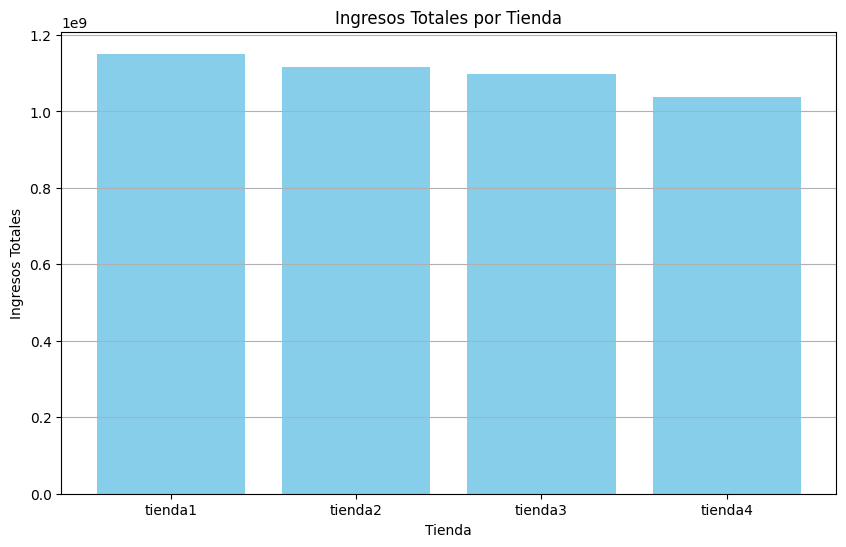

##COSTOS PROMEDIOS DE ENVIOS:
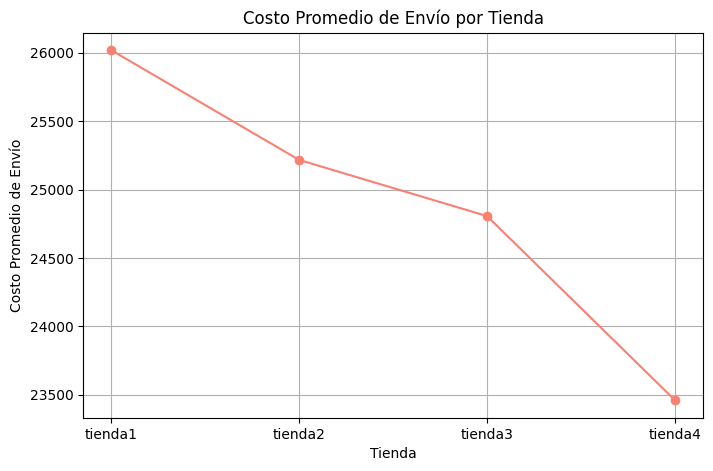

Podemos apreciar que la TIENDA_1 posee el coste promedio de envios mas elevado, mientras que la TIENDA_4 posee el coste mas bajo

##VENTAS POR CATEGORIA:
Se identificaron cuales fueron los productos por categorias, más populares para cada tienda,
los resutados que no mostramos en este informe estan disponibles en el analisis previo, podemos observar en el grafico
"por Categoria en TIENDA_1" ilustra las categorias con mayor ventas en la TIENDA_1

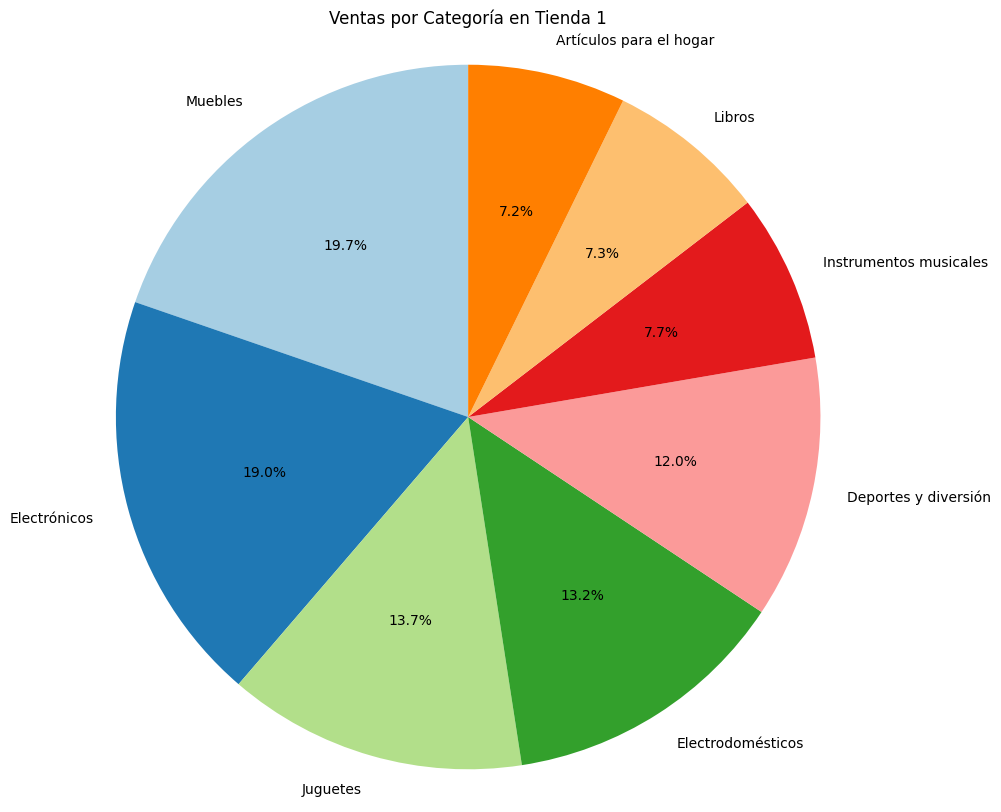

##CALIFICACIÓN PROMEDIO DE LA TIENDA:
Calculamos la calificación promedio de los clientes para cada producto en cada tienda, esto nos muestra una idea de la satisfacción del cliente para dchos productos,
el resultado lo podemos ver en nuestro analisis previo

##PRODUCTOS MÁS Y MENOS VENDIDOS:

Pudimos identificar que productos fueron los mas vendidos y menos vendidos por cada tienda, podemos ver detalles de estos productos en nuestro analisis ya que para este informe no incluimos los resultados obtenidos.

##JUSTIFICACIÓN:
Considerando los factores anteriormente descritos se le aconseja al Sr Joao vender la TIENDA_1
ya que esta tienda posee los mayores ingresos totales por ventas de todas las tiendas analizadas, convirtiendo esta en un gran atractivo para un futuro comprador.
gracias a su buenas distribucción que tiene en ventas por categoria la TIENDA_1 es una buena opción para que futuros compradores de la tienda del sr joao analisen las ventas de sus productos.
como una opcion de mejora esta  el coste promedio de envio el cual debe ser un punto de mejora para procimos propietarios, ya que este coste es mas elevado en esta tienda, aun asi el coste no afecta el volumen de ventas que posee
la TIENDA_1 sobre el resto de tiendas.

##CONCLUSIÓN:
Se da por concluido que la mejor opción de venta es la TIENDA_1, si bien las demás tiendas tienen sus puntos fuertes, la TIENDA_1 se destaca en terminos de generacion de ingresos, lo que hace de esta un ponto favorable para un futuro comprador,
dejando claro que debe tener como punto de mejora la forma de bajar su costo promedio de envio

